In [1]:
import perceval as pcvl
import perceval.components as comp
import numpy as np

In [2]:
pcvl.catalog.list()

['klm cnot',
 'heralded cnot',
 'postprocessed cnot',
 'heralded cz',
 'generic 2 mode circuit',
 'mzi phase first',
 'mzi phase last',
 'postprocessed ccz',
 'toffoli']

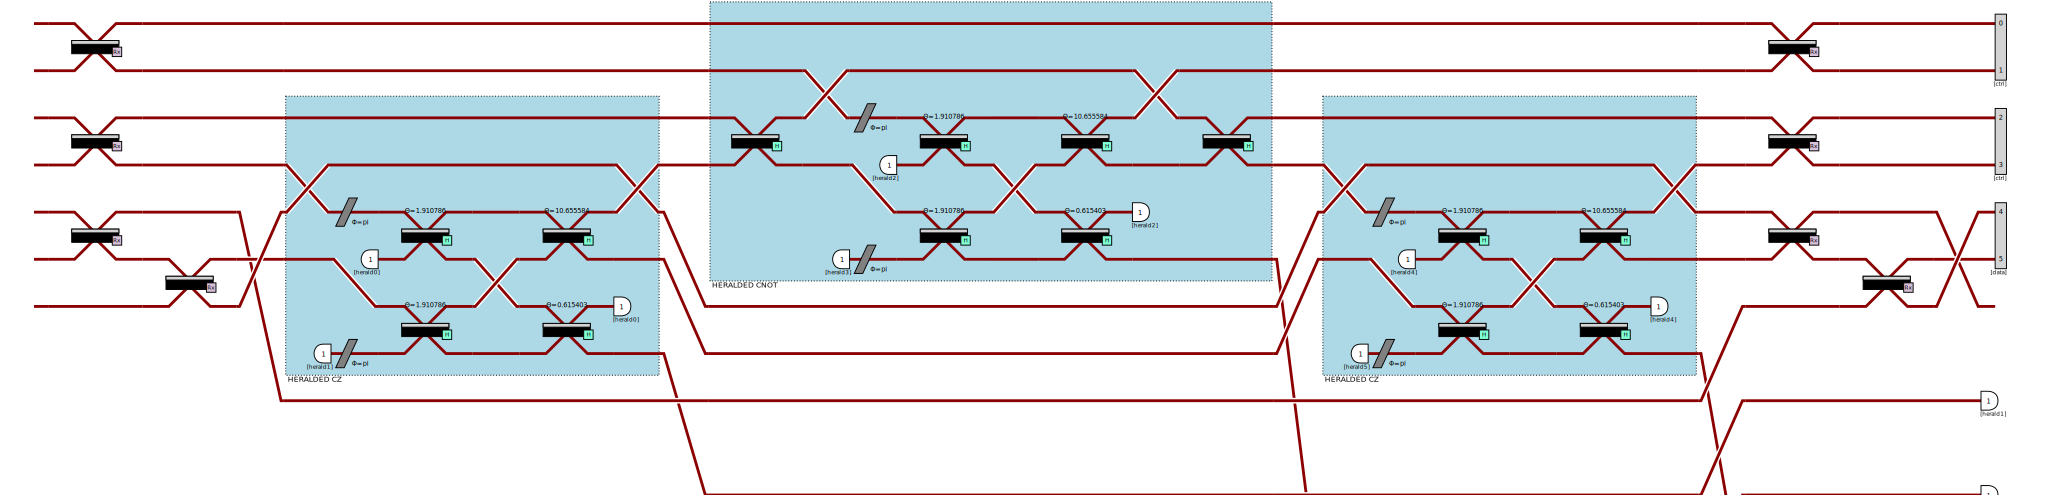

In [3]:
# 3 
custom = pcvl.Processor("SLOS", 7)
custom.add(0, pcvl.BS())
custom.add(2, pcvl.BS())
custom.add(4, pcvl.BS())
custom.add(5, pcvl.BS())
custom.add(4,comp.PERM([2, 1,0]))

custom.add(2, pcvl.catalog["heralded cz"].build_processor())
custom.add(0, pcvl.catalog["heralded cnot"].build_processor())
custom.add(2, pcvl.catalog["heralded cz"].build_processor())

custom.add(0, pcvl.BS())
custom.add(2, pcvl.BS())
custom.add(4, pcvl.BS())
custom.add(5, pcvl.BS())
custom.add(4,comp.PERM([2, 1,0]))

pcvl.pdisplay(custom, recursive=True)



In [4]:
"""custom.set_postselection(pcvl.PostSelect("[0,1]==1 & [2,3]==1 & [4,5]==1"))
custom.add_port(4, pcvl.Port(pcvl.Encoding.DUAL_RAIL, 'data')) 
pcvl.pdisplay(custom, recursive=True)
beceremdim"""

'custom.set_postselection(pcvl.PostSelect("[0,1]==1 & [2,3]==1 & [4,5]==1"))\ncustom.add_port(4, pcvl.Port(pcvl.Encoding.DUAL_RAIL, \'data\')) \npcvl.pdisplay(custom, recursive=True)\nbeceremdim'

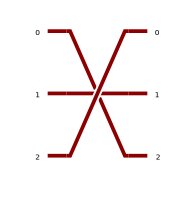

In [5]:
import perceval as pcvl
import perceval.components.unitary_components as comp
c = comp.PERM([2, 1,0])
pcvl.pdisplay(c)


In [6]:
states = {
    pcvl.BasicState([1, 0, 1, 0, 1, 0]): "000",
    pcvl.BasicState([1, 0, 1, 0, 0, 1]): "110",
    pcvl.BasicState([1, 0, 0, 1, 1, 0]): "010",
    pcvl.BasicState([1, 0, 0, 1, 0 , 1]): "011",

    pcvl.BasicState([0, 1, 0, 1, 0 , 1]): "011",
    pcvl.BasicState([0, 1, 1, 0, 0 , 1]): "011",
    pcvl.BasicState([0, 1, 0, 1, 1 , 0]): "011",
    pcvl.BasicState([0, 1, 0, 1, 0 , 1]): "011"

}

ca = pcvl.algorithm.Analyzer(custom, states)

truth_table = {"000": "000", "010": "010", "100": "100", "110": "110", "001": "001", "011": "011", "101": "101", "111": "111"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")


AssertionError: Incorrect BasicState size